Extração das variantes LOF para o gene CFTR e elaborar uma representação gráfica da distribuição dessas variantes, os transcritos e consequências. Os dados serão extraídos dos dados genômicos do gnomAD:

Link para a base de dados: https://gnomad.broadinstitute.org/downloads

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.read_csv('CFTR_GNOMAD.txt', delim_whitespace=True, low_memory=False)

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CHMI_CHMI3_WGS2_CHMI_CHMI3_WGS2,...,HG00288_HG00288,HG00290_HG00290,HG00304_HG00304,HG01765_HG01765,HG01766_HG01766,HG01767_HG01767,HG01768_HG01768,HG01785_HG01785,HG01786_HG01786,HG02219_HG02219
0,7,117480087,rs1800501,G,C,.,.,PR,GT,0/0,...,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1,7,117480125,rs1800072,G,A,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
2,7,117480168,rs189595246,G,A,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
3,7,117480192,rs372316624,A,G,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
4,7,117480196,rs1270693890,A,G,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,7,117668402,rs55831234,G,A,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
7008,7,117668418,.,G,A,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
7009,7,117668430,rs190470955,C,G,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
7010,7,117668561,rs554885039,G,A,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [2]:
path_gnomad = r"gnomad.v2.1.1.all_lofs.txt.bgz"
gnomad = pd.read_csv("gnomad.v2.1.1.all_lofs.txt.bgz", compression='gzip', on_bad_lines='skip', delim_whitespace=True, low_memory=False)
gnomad.rename(columns = {'pos':'Variant'}, inplace = True)

- CFTR
- Uma variante pode afetar mais de um transcritos, registrar quantos são afetados por cada consequencia
- registrar quantas variantes por cada consequencia

_______________________________________________________________________
tabela de variantes por consequência

In [3]:
gnomad

,chrom,Variant,ref,alt,most_severe_consequence,gene_ids,gene_symbols,transcript_ids
0,1,69456,C,CCTACA,frameshift_variant,ENSG00000186092,OR4F5,ENST00000335137
1,1,69469,ACAATT,A,frameshift_variant,ENSG00000186092,OR4F5,ENST00000335137
2,1,69516,G,A,stop_gained,ENSG00000186092,OR4F5,ENST00000335137
3,1,69620,TA,T,frameshift_variant,ENSG00000186092,OR4F5,ENST00000335137
4,1,69702,TG,T,frameshift_variant,ENSG00000186092,OR4F5,ENST00000335137
...,...,...,...,...,...,...,...,...
443764,Y,22921918,C,G,stop_gained,ENSG00000157828,RPS4Y2,ENST00000288666
443765,Y,22930689,A,G,splice_acceptor_variant,ENSG00000157828,RPS4Y2,ENST00000288666
443766,Y,22930763,C,T,stop_gained,ENSG00000157828,RPS4Y2,ENST00000288666
443767,Y,25375763,CA,C,frameshift_variant,ENSG00000205944,DAZ2,"ENST00000382440,ENST00000382433,ENST0000038229..."


In [3]:
all = gnomad[(gnomad['gene_symbols'] == 'CFTR')].drop(['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols'], axis=1)

In [22]:
all

,Variant,most_severe_consequence,transcript_ids
184432,117120152,2,"ENST00000003084,ENST00000426809,ENST00000454343"
184433,117120190,1,"ENST00000003084,ENST00000426809,ENST00000454343"
184434,117120202,3,"ENST00000003084,ENST00000426809,ENST00000454343"
184435,117144332,2,"ENST00000003084,ENST00000426809,ENST00000454343"
184436,117144404,1,"ENST00000003084,ENST00000426809,ENST00000454343"
...,...,...,...
184572,117305519,2,"ENST00000003084,ENST00000426809,ENST0000045434..."
184573,117305610,2,"ENST00000003084,ENST00000426809,ENST00000454343"
184574,117305619,3,"ENST00000003084,ENST00000426809,ENST0000045434..."
184575,117307003,1,"ENST00000003084,ENST00000426809,ENST00000454343"


In [30]:
all.iloc[3,2]

'ENST00000003084,ENST00000426809,ENST00000454343'

In [29]:
type(all.iloc[3,2])

str

In [31]:
all.iloc[3,2].split(",")

['ENST00000003084', 'ENST00000426809', 'ENST00000454343']

In [9]:
all.transcript_ids.unique()

array(['ENST00000003084,ENST00000426809,ENST00000454343',
       'ENST00000003084,ENST00000426809,ENST00000446805,ENST00000454343',
       'ENST00000003084,ENST00000454343',
       'ENST00000003084,ENST00000426809',
       'ENST00000003084,ENST00000426809,ENST00000454343,ENST00000468795',
       'ENST00000003084,ENST00000426809,ENST00000454343,ENST00000600166'],
      dtype=object)

__________________________________________________________________
heatmap e clustermap relacionando as variantes e transcritos através das consequências

In [12]:
all = all.replace(['frameshift_variant','stop_gained','splice_donor_variant','splice_acceptor_variant'], [1,2,3,4])
#substituindo os nomes das consequências por inteiros para facilitar o heatmap e clustermap

novas_linhas = []

for tupla in all.itertuples(): #itera entre as linhas do dataframe como tuplas
    variante = tupla[1]
    consequencia = tupla[2]
    transcritos = tupla[3].split(",")
    for transcrito in transcritos:
        novas_linhas.append([variante, transcrito, consequencia])

df = pd.DataFrame(novas_linhas, columns=["Variante", "Transcrito", "Consequencia"])

df2 = df.pivot_table(index = "Variante", columns="Transcrito",
                      values="Consequencia", fill_value=0).T #df2 relaciona variante e transcrito através de uma consequência
df2

Variante,117120152,117120190,117120202,117144332,117144404,117149101,117149146,117149150,117149156,117149181,...,117292905,117292924,117304740,117304832,117304889,117305519,117305610,117305619,117307003,117307015
Transcrito,,,,,,,,,,,,,,,,,,,,,
ENST00000003084,2.0,1.0,3.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0
ENST00000426809,2.0,1.0,3.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0
ENST00000446805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENST00000454343,2.0,1.0,3.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0
ENST00000468795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENST00000600166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,4.0,2.0,2.0,2.0,0.0,3.0,0.0,0.0


In [14]:
df

,Variante,Transcrito,Consequencia
0,117120152,ENST00000003084,2
1,117120152,ENST00000426809,2
2,117120152,ENST00000454343,2
3,117120190,ENST00000003084,1
4,117120190,ENST00000426809,1
...,...,...,...
451,117307003,ENST00000426809,1
452,117307003,ENST00000454343,1
453,117307015,ENST00000003084,1
454,117307015,ENST00000426809,1


In [10]:
transcritos

['ENST00000003084', 'ENST00000426809', 'ENST00000454343']

In [6]:
df2

Variante,117120152,117120190,117120202,117144332,117144404,117149101,117149146,117149150,117149156,117149181,...,117292905,117292924,117304740,117304832,117304889,117305519,117305610,117305619,117307003,117307015
Transcrito,,,,,,,,,,,,,,,,,,,,,
ENST00000003084,2.0,1.0,3.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0
ENST00000426809,2.0,1.0,3.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0
ENST00000446805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENST00000454343,2.0,1.0,3.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0
ENST00000468795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENST00000600166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,4.0,2.0,2.0,2.0,0.0,3.0,0.0,0.0


____________________________________________________________________
heatmap

In [6]:
unique_variantes = df['Variante'].unique()
unique_transc = df['Transcrito'].unique()

In [7]:
unique_transc

array(['ENST00000003084', 'ENST00000426809', 'ENST00000454343',
       'ENST00000446805', 'ENST00000468795', 'ENST00000600166'],
      dtype=object)

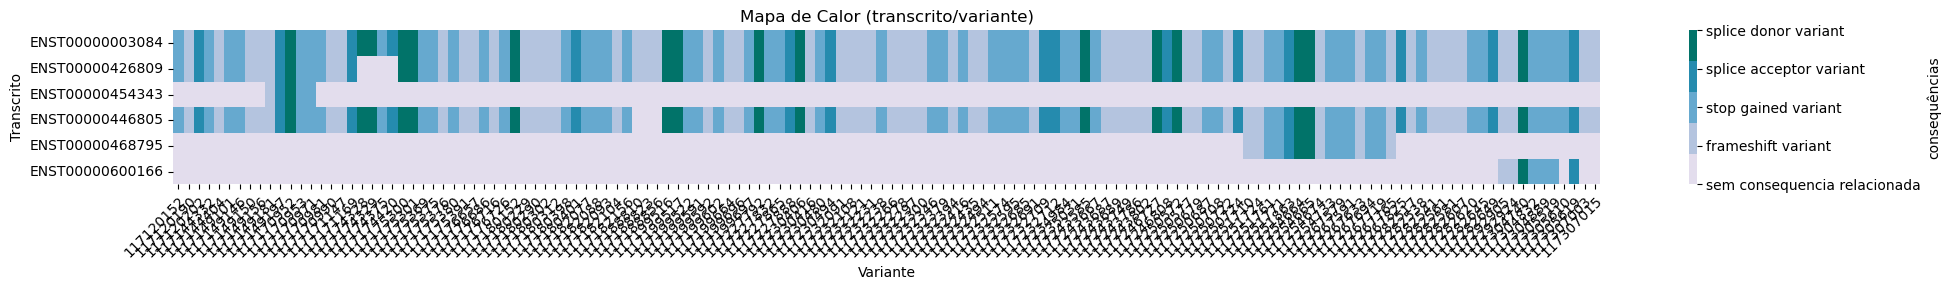

In [9]:
fig, ax = plt.subplots(figsize=(20, 3))
cmap = sns.color_palette("PuBuGn", 5)

sns.heatmap(df2, vmin=0, vmax = 4,
            cmap = cmap, cbar_kws={'label': 'consequências'},
            xticklabels = unique_variantes,
            yticklabels = unique_transc)

c_bar = ax.collections[0].colorbar
c_bar.set_ticks([0, 1, 2, 3, 4])
c_bar.set_ticklabels(['sem consequencia relacionada','frameshift variant', 'stop gained variant',  'splice acceptor variant', 'splice donor variant'])

plt.setp(ax.get_xticklabels(),
         rotation=45,
         ha="right",
         rotation_mode="anchor")
ax.set_title("Mapa de Calor (transcrito/variante)")
plt.savefig("heatmap.png")
plt.tight_layout()
plt.show()


______________________________________________________________
clustermap

In [8]:
metrica = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard',
           'jensenshannon', 'kulczynski1', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
           'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']
#Distance metric to use for the data

metodo = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward'] #Linkage method to use for calculating clusters

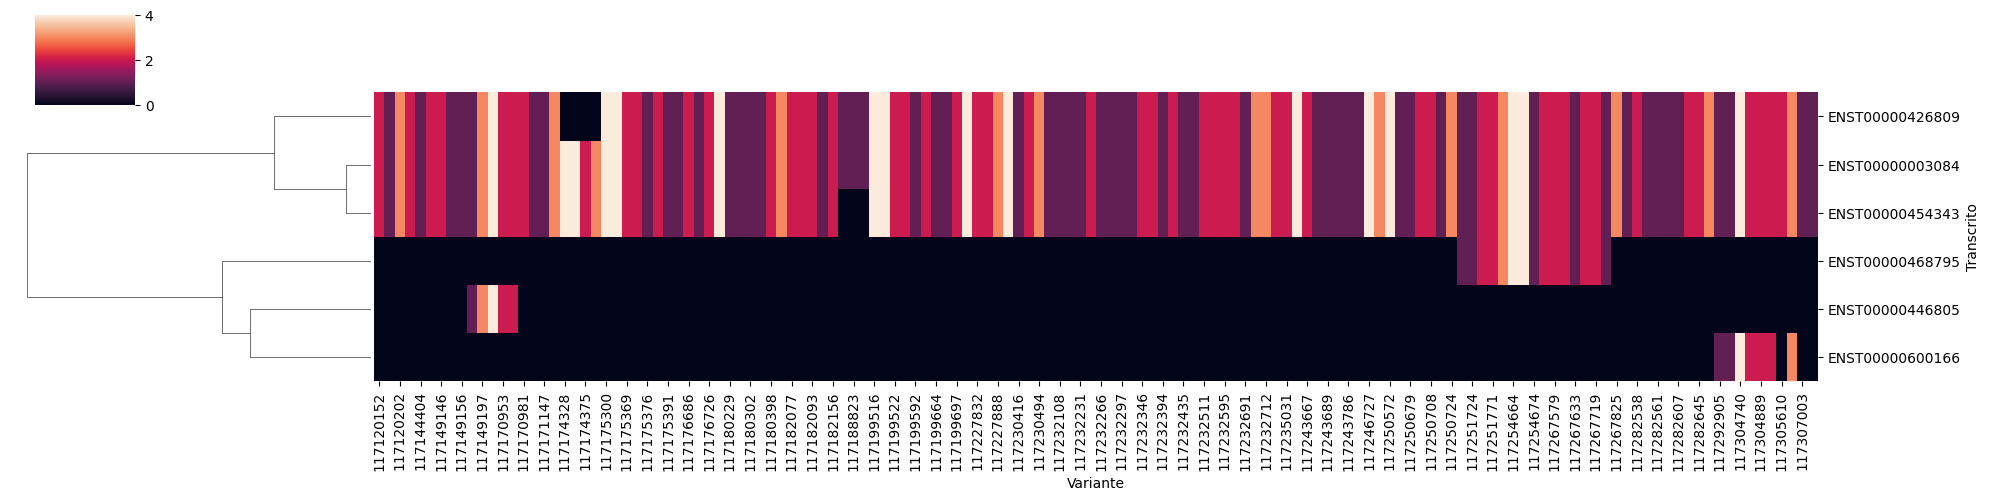

In [9]:
sns.clustermap(df2,
               method = 'average',
               metric = 'euclidean',
               row_cluster = True,
               col_cluster = False,
               figsize = (20,5))
plt.show()

_________________________________________________________________________


In [10]:
frame_transc = gnomad[(gnomad['gene_symbols'] == 'CFTR') & (gnomad['most_severe_consequence'] == 'frameshift_variant')].drop(['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols'], axis=1).values.T
stop_transc = gnomad[(gnomad['gene_symbols'] == 'CFTR') & (gnomad['most_severe_consequence'] == 'stop_gained')].drop(['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols'], axis=1).values.T
splice_transc = gnomad[(gnomad['gene_symbols'] == 'CFTR') & (gnomad['most_severe_consequence'] == 'splice_acceptor_variant')].drop(['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols'], axis=1).values.T
donor_transc = gnomad[(gnomad['gene_symbols'] == 'CFTR') & (gnomad['most_severe_consequence'] == 'splice_donor_variant')].drop(['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols'], axis=1).values.T

In [11]:
#padding das variantes para poder criar o dataframe
new_v_sg = np.pad(stop_transc[0],(0, 6))
new_v_splice = np.pad(splice_transc[0],(0,40))
new_v_donor = np.pad(donor_transc[0],(0,41))

In [13]:
##criando DataFrame das variantes por conseq
data = np.array([frame_transc[0], new_v_sg, new_v_splice, new_v_donor])
column_name = ('frameshift variant', 'stop gained variant',  'splice acceptor variant', 'splice donor variant')
tabela = pd.DataFrame(data.T, columns = ('frameshift variant', 'stop gained variant',  'splice acceptor variant', 'splice donor variant'))
tabela = tabela.replace(0,' ') #substituindo os zeros por vazio

l = [len(frame_transc[0]), len(stop_transc[0]), len(splice_transc[0]), len(donor_transc[0])]

In [ ]:
##gráfico de pizza para visualizar as quantidades (em porcentagem) das variantes por consequência
labels = column_name
sizes = l
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

#explsion
explode = (0.07,0.05,0.03,0.03)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
##tabela de variantes por consequência
fig, ax =plt.subplots(1,1)
ax.table(cellText=tabela.values,
        colLabels=tabela.columns,
        colColours =["gray"] * 4,
        loc="center")
ax.axis("off")
plt.show()